# Data Acquisition:
Using the given function **vsweep** from PROCEDURE_PlasmaExperiment_v2.ipynb, the Keithley was programmed to sweep through a range of voltages, collecting data current and voltage data at each step.
| vlow | vhigh | vstep| vfloat |
| ---  | ---   | ---  | ---    |
| -250 | -100  |  1   | -225   |

The parameters inside of the probe were also measured while the data was being created.

| Parameters           |Run 1 | Run 2 |
| ---------------------| ---- | ----- |
| Pressure (mTorr)     | 387  | 382   |
| Initial Current (mA) | 4.85 | 4.81  |
| Final Current (mA)   | 4.81 | 4.81  |
| Voltage              | 1200 | 1200  |

# Plotting the data:
The two arrays of current and voltage values are loaded into a pandas dataframe and plotted, as well as the average between the two files. 

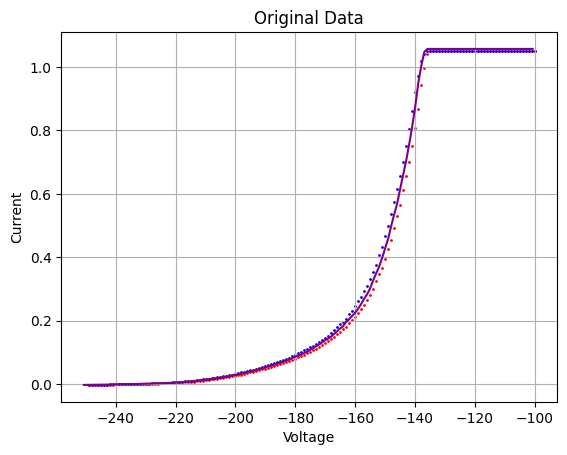

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plasma_data1 = pd.read_csv('data/langmuirprobe1.csv')
plasma_data2 = pd.read_csv('data/langmuirprobe2.csv')
# 3rd data file doesn't include the plateau
#plasma_data3 = pd.read_csv('data/langmuirprobe3.csv')
x1 = plasma_data1.iloc[:,0]
y1 = plasma_data1.iloc[:,1] * 1000

x2 = plasma_data2.iloc[:,0]
y2 = plasma_data2.iloc[:,1] * 1000

x_avg = x1 + x2 / len(x1)
x_avg = np.array(x_avg, dtype=np.float64)
y_avg = y1 + y2 / len(y1)
y_avg = np.array(y_avg, dtype=np.float64)

plt.scatter(x1, y1, s=1, c='red')
plt.scatter(x2, y2, s=1, c='blue')
plt.plot(x_avg, y_avg, c='purple')
plt.xlabel('Voltage')
plt.ylabel('Current')
plt.title('Original Data')
plt.grid(True)
plt.show()

# Data Analysis:
### The Ion Current:
As seen on the data (and as described in Merlino, R.K. (2007)), the current that is measured by the probe has an exponential increase as the voltage across the probe increases until, at a certain point, the current abruptly plateaus. 

Our data was collected as a bias voltage, $V_B$ swept from a negative towards a positive potential. When $V_B$ reaches a critical point in comparison with the plasma potential, $V_P$, the probe measures the ion saturation current, $I_{is}$. From there, positive ions continue to be collected by the probe until $V_B$ reaches $V_P$, and ions begin to be repelled by the probe. 

When $V_B \gg V_P$, all ions are repelled, dropping the ion current, $I_i$ to 0.

At the temperature $T_i$, the dependance of the ion current on $V_B$ is given as:

$$\begin{equation}
 I_i(V_B) =
   \left\{\begin{array}{lr}
       -I_{is} exp[\frac{e(V_P - V_B)}{kT_i}], & V_B \ge V_P \\
       -I_{is}, & V_B \lt V_P 
    \end{array}\right.
 \end{equation}$$

Where:
* $I_i$ is the ion current,

* $I_{is}$ is ion saturation current  
   * Given by $I_{is} = \frac{1}{4}e n_i v_{i,th} A_{probe}$
   * $n_i$ is the ion density, 
   * $v_{i,th}=\sqrt{\frac{8kT_{i}}{\pi m_i}}$ is the ion thermal speed, 
   * $m_i$ is the ion mass,
   * $A_{probe}$ is the probe collecting area

* $V_B$ the bias voltage,

* $V_P$ the plasma potential, 

* $e$ the electron charge
   * $1.60 \cdot 10^{-19}$ J (or 1eV)

* $k$ the Boltzmann constant
   * $1.38 \cdot 10^{-23} J/K$ (or $8.62 \cdot 10^{-5} eV \cdot K$)